## Load data

In [2]:
import pandas as pd
output_path = '../Data/Processed_Data/'
df = pd.read_csv(output_path+'pacmap_output/pacmap_2d_output_peds_dx_aml.csv', index_col=0)

## Preprocess data

### Exclude categories with <10 samples

In [5]:
# exclude the samples with mixed phenotypes and Down syndrome and t(9;22)(q34.1;q11.2)/BCR::ABL1
df = df[~df['ELN AML 2022 Diagnosis'].isin(['Mixed phenotype acute leukemia T/myeloid',
                                       'Myeloid leukaemia associated with Down syndrome',
                                       'AML with t(9;22)(q34.1;q11.2)/BCR::ABL1',
                                       'APL with t(15;17)(q24.1;q21.2)/PML::RARA'])]

In [6]:
df['ELN AML 2022 Diagnosis'].value_counts()

ELN AML 2022 Diagnosis
AML with t(9;11)(p22;q23.3)/KMT2A-rearrangement                           216
AML with t(8;21)(q22;q22.1)/RUNX1::RUNX1T1                                134
AML with other rare recurring translocations                              128
AML with inv(16)(p13.1q22) or t(16;16)(p13.1;q22)/CBFB::MYH11             123
Otherwise-Normal Control                                                  111
AML with mutated NPM1                                                      88
AML with in-frame bZIP mutated CEBPA                                       38
AML with t(6;9)(p23;q34.1)/DEK::NUP214                                     22
MDS-related or secondary myeloid neoplasms                                 15
AML with inv(3)(q21.3q26.2) or t(3;3)(q21.3;q26.2)/MECOM-rearrangement      5
Name: count, dtype: int64

### Exclude samples with missing labels

In [3]:
# drop the samples with missing labels for the ELN AML 2022 Diagnosis
df = df[~df['ELN AML 2022 Diagnosis'].isna()]

### Define X and y

In [4]:

# Define X and y
X = df[['PaCMAP 1', 'PaCMAP 2']].to_numpy()
y = df['ELN AML 2022 Diagnosis'].to_numpy()

In [5]:
# One hot encode the labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

## Define model architecture

[2 inputs] -> [8 hidden neurons] -> [11 outputs]

Epoch 0: 100%|██████████| 123/123 [00:00<00:00, 308.82batch/s, acc=0.4, loss=4.21]


Epoch 0 validation: Cross-entropy=5.02, Accuracy=16.6%


Epoch 1: 100%|██████████| 123/123 [00:00<00:00, 679.93batch/s, acc=0.4, loss=2.59]


Epoch 1 validation: Cross-entropy=3.03, Accuracy=24.2%


Epoch 2: 100%|██████████| 123/123 [00:00<00:00, 663.55batch/s, acc=0.4, loss=1.44]


Epoch 2 validation: Cross-entropy=2.02, Accuracy=29.8%


Epoch 3: 100%|██████████| 123/123 [00:00<00:00, 696.72batch/s, acc=0.8, loss=0.93] 


Epoch 3 validation: Cross-entropy=1.63, Accuracy=46.0%


Epoch 4: 100%|██████████| 123/123 [00:00<00:00, 717.93batch/s, acc=0.8, loss=0.74] 


Epoch 4 validation: Cross-entropy=1.45, Accuracy=45.7%


Epoch 5: 100%|██████████| 123/123 [00:00<00:00, 669.09batch/s, acc=0.8, loss=0.641]


Epoch 5 validation: Cross-entropy=1.35, Accuracy=50.2%


Epoch 6: 100%|██████████| 123/123 [00:00<00:00, 729.21batch/s, acc=0.8, loss=0.596]


Epoch 6 validation: Cross-entropy=1.30, Accuracy=53.6%


Epoch 7: 100%|██████████| 123/123 [00:00<00:00, 578.94batch/s, acc=0.8, loss=0.578]


Epoch 7 validation: Cross-entropy=1.27, Accuracy=54.7%


Epoch 8: 100%|██████████| 123/123 [00:00<00:00, 735.57batch/s, acc=0.8, loss=0.57] 


Epoch 8 validation: Cross-entropy=1.24, Accuracy=56.2%


Epoch 9: 100%|██████████| 123/123 [00:00<00:00, 733.27batch/s, acc=0.8, loss=0.568]


Epoch 9 validation: Cross-entropy=1.21, Accuracy=60.0%


Epoch 10: 100%|██████████| 123/123 [00:00<00:00, 650.68batch/s, acc=0.8, loss=0.568]


Epoch 10 validation: Cross-entropy=1.19, Accuracy=63.0%


Epoch 11: 100%|██████████| 123/123 [00:00<00:00, 675.69batch/s, acc=0.8, loss=0.57] 


Epoch 11 validation: Cross-entropy=1.18, Accuracy=64.5%


Epoch 12: 100%|██████████| 123/123 [00:00<00:00, 687.72batch/s, acc=0.8, loss=0.573]


Epoch 12 validation: Cross-entropy=1.16, Accuracy=66.8%


Epoch 13: 100%|██████████| 123/123 [00:00<00:00, 676.74batch/s, acc=0.8, loss=0.577]


Epoch 13 validation: Cross-entropy=1.15, Accuracy=67.9%


Epoch 14: 100%|██████████| 123/123 [00:00<00:00, 540.15batch/s, acc=0.8, loss=0.581]


Epoch 14 validation: Cross-entropy=1.14, Accuracy=69.1%


Epoch 15: 100%|██████████| 123/123 [00:00<00:00, 591.23batch/s, acc=0.8, loss=0.586]


Epoch 15 validation: Cross-entropy=1.13, Accuracy=69.4%


Epoch 16: 100%|██████████| 123/123 [00:00<00:00, 615.31batch/s, acc=0.8, loss=0.591]


Epoch 16 validation: Cross-entropy=1.12, Accuracy=69.4%


Epoch 17: 100%|██████████| 123/123 [00:00<00:00, 604.40batch/s, acc=0.8, loss=0.595]


Epoch 17 validation: Cross-entropy=1.11, Accuracy=69.8%


Epoch 18: 100%|██████████| 123/123 [00:00<00:00, 622.84batch/s, acc=0.8, loss=0.6]  

Epoch 18 validation: Cross-entropy=1.10, Accuracy=69.8%



Epoch 19: 100%|██████████| 123/123 [00:00<00:00, 590.33batch/s, acc=0.8, loss=0.604]


Epoch 19 validation: Cross-entropy=1.10, Accuracy=70.2%


Epoch 20: 100%|██████████| 123/123 [00:00<00:00, 589.79batch/s, acc=0.8, loss=0.609]


Epoch 20 validation: Cross-entropy=1.09, Accuracy=70.6%


Epoch 21: 100%|██████████| 123/123 [00:00<00:00, 621.17batch/s, acc=0.8, loss=0.614]


Epoch 21 validation: Cross-entropy=1.09, Accuracy=70.6%


Epoch 22: 100%|██████████| 123/123 [00:00<00:00, 596.34batch/s, acc=0.8, loss=0.618]


Epoch 22 validation: Cross-entropy=1.08, Accuracy=70.6%


Epoch 23: 100%|██████████| 123/123 [00:00<00:00, 534.71batch/s, acc=0.6, loss=0.623]


Epoch 23 validation: Cross-entropy=1.08, Accuracy=70.6%


Epoch 24: 100%|██████████| 123/123 [00:00<00:00, 640.58batch/s, acc=0.6, loss=0.627]


Epoch 24 validation: Cross-entropy=1.07, Accuracy=70.9%


Epoch 25: 100%|██████████| 123/123 [00:00<00:00, 636.52batch/s, acc=0.6, loss=0.631]


Epoch 25 validation: Cross-entropy=1.07, Accuracy=70.9%


Epoch 26: 100%|██████████| 123/123 [00:00<00:00, 589.84batch/s, acc=0.6, loss=0.634]


Epoch 26 validation: Cross-entropy=1.07, Accuracy=71.3%


Epoch 27: 100%|██████████| 123/123 [00:00<00:00, 627.03batch/s, acc=0.6, loss=0.638]


Epoch 27 validation: Cross-entropy=1.06, Accuracy=71.3%


Epoch 28: 100%|██████████| 123/123 [00:00<00:00, 645.51batch/s, acc=0.6, loss=0.641]


Epoch 28 validation: Cross-entropy=1.06, Accuracy=71.3%


Epoch 29: 100%|██████████| 123/123 [00:00<00:00, 644.65batch/s, acc=0.6, loss=0.644]


Epoch 29 validation: Cross-entropy=1.06, Accuracy=71.3%


Epoch 30: 100%|██████████| 123/123 [00:00<00:00, 636.15batch/s, acc=0.6, loss=0.647]


Epoch 30 validation: Cross-entropy=1.05, Accuracy=71.3%


Epoch 31: 100%|██████████| 123/123 [00:00<00:00, 620.91batch/s, acc=0.6, loss=0.651]


Epoch 31 validation: Cross-entropy=1.05, Accuracy=71.7%


Epoch 32: 100%|██████████| 123/123 [00:00<00:00, 602.01batch/s, acc=0.6, loss=0.653]


Epoch 32 validation: Cross-entropy=1.05, Accuracy=71.7%


Epoch 33: 100%|██████████| 123/123 [00:00<00:00, 619.21batch/s, acc=0.6, loss=0.656]


Epoch 33 validation: Cross-entropy=1.05, Accuracy=71.7%


Epoch 34: 100%|██████████| 123/123 [00:00<00:00, 612.49batch/s, acc=0.6, loss=0.659]


Epoch 34 validation: Cross-entropy=1.05, Accuracy=72.1%


Epoch 35: 100%|██████████| 123/123 [00:00<00:00, 617.09batch/s, acc=0.6, loss=0.662]


Epoch 35 validation: Cross-entropy=1.04, Accuracy=71.7%


Epoch 36: 100%|██████████| 123/123 [00:00<00:00, 642.87batch/s, acc=0.6, loss=0.664]


Epoch 36 validation: Cross-entropy=1.04, Accuracy=71.7%


Epoch 37: 100%|██████████| 123/123 [00:00<00:00, 630.31batch/s, acc=0.6, loss=0.666]


Epoch 37 validation: Cross-entropy=1.04, Accuracy=71.7%


Epoch 38: 100%|██████████| 123/123 [00:00<00:00, 623.87batch/s, acc=0.6, loss=0.668]


Epoch 38 validation: Cross-entropy=1.04, Accuracy=71.7%


Epoch 39: 100%|██████████| 123/123 [00:00<00:00, 596.10batch/s, acc=0.6, loss=0.67] 


Epoch 39 validation: Cross-entropy=1.04, Accuracy=71.7%


Epoch 40: 100%|██████████| 123/123 [00:00<00:00, 613.95batch/s, acc=0.6, loss=0.673]


Epoch 40 validation: Cross-entropy=1.04, Accuracy=71.7%


Epoch 41: 100%|██████████| 123/123 [00:00<00:00, 607.71batch/s, acc=0.6, loss=0.673]


Epoch 41 validation: Cross-entropy=1.04, Accuracy=71.7%


Epoch 42: 100%|██████████| 123/123 [00:00<00:00, 585.79batch/s, acc=0.6, loss=0.671]


Epoch 42 validation: Cross-entropy=1.04, Accuracy=71.7%


Epoch 43: 100%|██████████| 123/123 [00:00<00:00, 634.40batch/s, acc=0.6, loss=0.669]


Epoch 43 validation: Cross-entropy=1.03, Accuracy=71.7%


Epoch 44: 100%|██████████| 123/123 [00:00<00:00, 618.68batch/s, acc=0.6, loss=0.667]


Epoch 44 validation: Cross-entropy=1.03, Accuracy=71.7%


Epoch 45: 100%|██████████| 123/123 [00:00<00:00, 591.14batch/s, acc=0.6, loss=0.667]


Epoch 45 validation: Cross-entropy=1.03, Accuracy=71.7%


Epoch 46: 100%|██████████| 123/123 [00:00<00:00, 631.17batch/s, acc=0.6, loss=0.666]


Epoch 46 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 47: 100%|██████████| 123/123 [00:00<00:00, 615.98batch/s, acc=0.6, loss=0.666]


Epoch 47 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 48: 100%|██████████| 123/123 [00:00<00:00, 626.30batch/s, acc=0.6, loss=0.667]


Epoch 48 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 49: 100%|██████████| 123/123 [00:00<00:00, 638.50batch/s, acc=0.6, loss=0.668]


Epoch 49 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 50: 100%|██████████| 123/123 [00:00<00:00, 620.71batch/s, acc=0.6, loss=0.669]


Epoch 50 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 51: 100%|██████████| 123/123 [00:00<00:00, 597.61batch/s, acc=0.6, loss=0.671]


Epoch 51 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 52: 100%|██████████| 123/123 [00:00<00:00, 645.50batch/s, acc=0.6, loss=0.673]


Epoch 52 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 53: 100%|██████████| 123/123 [00:00<00:00, 650.30batch/s, acc=0.6, loss=0.674]


Epoch 53 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 54: 100%|██████████| 123/123 [00:00<00:00, 637.51batch/s, acc=0.6, loss=0.675]


Epoch 54 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 55: 100%|██████████| 123/123 [00:00<00:00, 641.05batch/s, acc=0.6, loss=0.677]


Epoch 55 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 56: 100%|██████████| 123/123 [00:00<00:00, 621.43batch/s, acc=0.6, loss=0.678]


Epoch 56 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 57: 100%|██████████| 123/123 [00:00<00:00, 593.68batch/s, acc=0.6, loss=0.679]


Epoch 57 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 58: 100%|██████████| 123/123 [00:00<00:00, 529.63batch/s, acc=0.6, loss=0.68] 


Epoch 58 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 59: 100%|██████████| 123/123 [00:00<00:00, 637.09batch/s, acc=0.6, loss=0.681]


Epoch 59 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 60: 100%|██████████| 123/123 [00:00<00:00, 620.35batch/s, acc=0.6, loss=0.682]


Epoch 60 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 61: 100%|██████████| 123/123 [00:00<00:00, 636.40batch/s, acc=0.6, loss=0.684]


Epoch 61 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 62: 100%|██████████| 123/123 [00:00<00:00, 642.81batch/s, acc=0.6, loss=0.685]


Epoch 62 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 63: 100%|██████████| 123/123 [00:00<00:00, 578.72batch/s, acc=0.6, loss=0.686]


Epoch 63 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 64: 100%|██████████| 123/123 [00:00<00:00, 638.91batch/s, acc=0.6, loss=0.687]


Epoch 64 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 65: 100%|██████████| 123/123 [00:00<00:00, 638.62batch/s, acc=0.6, loss=0.688]


Epoch 65 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 66: 100%|██████████| 123/123 [00:00<00:00, 618.63batch/s, acc=0.6, loss=0.69] 


Epoch 66 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 67: 100%|██████████| 123/123 [00:00<00:00, 636.70batch/s, acc=0.6, loss=0.692]


Epoch 67 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 68: 100%|██████████| 123/123 [00:00<00:00, 629.43batch/s, acc=0.6, loss=0.695]


Epoch 68 validation: Cross-entropy=1.03, Accuracy=72.1%


Epoch 69: 100%|██████████| 123/123 [00:00<00:00, 587.34batch/s, acc=0.6, loss=0.696]


Epoch 69 validation: Cross-entropy=1.04, Accuracy=72.1%


Epoch 70: 100%|██████████| 123/123 [00:00<00:00, 619.60batch/s, acc=0.6, loss=0.695]

Epoch 70 validation: Cross-entropy=1.04, Accuracy=72.1%

Epoch 71: 100%|██████████| 123/123 [00:00<00:00, 615.74batch/s, acc=0.6, loss=0.696]


Epoch 71 validation: Cross-entropy=1.04, Accuracy=72.1%


Epoch 72: 100%|██████████| 123/123 [00:00<00:00, 644.16batch/s, acc=0.6, loss=0.697]


Epoch 72 validation: Cross-entropy=1.04, Accuracy=72.1%


Epoch 73: 100%|██████████| 123/123 [00:00<00:00, 622.87batch/s, acc=0.6, loss=0.698]


Epoch 73 validation: Cross-entropy=1.04, Accuracy=72.1%


Epoch 74: 100%|██████████| 123/123 [00:00<00:00, 632.45batch/s, acc=0.6, loss=0.698]


Epoch 74 validation: Cross-entropy=1.04, Accuracy=72.1%


Epoch 75: 100%|██████████| 123/123 [00:00<00:00, 605.60batch/s, acc=0.6, loss=0.698]


Epoch 75 validation: Cross-entropy=1.04, Accuracy=72.1%


Epoch 76: 100%|██████████| 123/123 [00:00<00:00, 615.37batch/s, acc=0.6, loss=0.699]


Epoch 76 validation: Cross-entropy=1.04, Accuracy=72.5%


Epoch 77: 100%|██████████| 123/123 [00:00<00:00, 639.18batch/s, acc=0.6, loss=0.701]


Epoch 77 validation: Cross-entropy=1.04, Accuracy=72.5%


Epoch 78: 100%|██████████| 123/123 [00:00<00:00, 623.87batch/s, acc=0.6, loss=0.701]


Epoch 78 validation: Cross-entropy=1.04, Accuracy=72.5%


Epoch 79: 100%|██████████| 123/123 [00:00<00:00, 628.86batch/s, acc=0.6, loss=0.702]


Epoch 79 validation: Cross-entropy=1.04, Accuracy=72.5%


Epoch 80: 100%|██████████| 123/123 [00:00<00:00, 624.52batch/s, acc=0.6, loss=0.704]


Epoch 80 validation: Cross-entropy=1.04, Accuracy=72.5%


Epoch 81: 100%|██████████| 123/123 [00:00<00:00, 573.90batch/s, acc=0.6, loss=0.704]


Epoch 81 validation: Cross-entropy=1.04, Accuracy=72.5%


Epoch 82: 100%|██████████| 123/123 [00:00<00:00, 615.87batch/s, acc=0.6, loss=0.705]


Epoch 82 validation: Cross-entropy=1.04, Accuracy=72.5%


Epoch 83: 100%|██████████| 123/123 [00:00<00:00, 631.13batch/s, acc=0.6, loss=0.705]


Epoch 83 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 84: 100%|██████████| 123/123 [00:00<00:00, 633.25batch/s, acc=0.6, loss=0.707]


Epoch 84 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 85: 100%|██████████| 123/123 [00:00<00:00, 633.09batch/s, acc=0.6, loss=0.707]


Epoch 85 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 86: 100%|██████████| 123/123 [00:00<00:00, 578.88batch/s, acc=0.6, loss=0.709]


Epoch 86 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 87: 100%|██████████| 123/123 [00:00<00:00, 629.90batch/s, acc=0.6, loss=0.709]


Epoch 87 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 88: 100%|██████████| 123/123 [00:00<00:00, 564.11batch/s, acc=0.6, loss=0.709]


Epoch 88 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 89: 100%|██████████| 123/123 [00:00<00:00, 564.57batch/s, acc=0.6, loss=0.711]


Epoch 89 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 90: 100%|██████████| 123/123 [00:00<00:00, 623.40batch/s, acc=0.6, loss=0.711]


Epoch 90 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 91: 100%|██████████| 123/123 [00:00<00:00, 637.38batch/s, acc=0.6, loss=0.711]


Epoch 91 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 92: 100%|██████████| 123/123 [00:00<00:00, 592.52batch/s, acc=0.6, loss=0.713]


Epoch 92 validation: Cross-entropy=1.05, Accuracy=72.5%


Epoch 93: 100%|██████████| 123/123 [00:00<00:00, 650.89batch/s, acc=0.6, loss=0.714]


Epoch 93 validation: Cross-entropy=1.06, Accuracy=72.5%


Epoch 94: 100%|██████████| 123/123 [00:00<00:00, 638.97batch/s, acc=0.6, loss=0.714]


Epoch 94 validation: Cross-entropy=1.06, Accuracy=72.5%


Epoch 95: 100%|██████████| 123/123 [00:00<00:00, 634.97batch/s, acc=0.6, loss=0.714]


Epoch 95 validation: Cross-entropy=1.06, Accuracy=72.5%


Epoch 96: 100%|██████████| 123/123 [00:00<00:00, 612.74batch/s, acc=0.6, loss=0.715]


Epoch 96 validation: Cross-entropy=1.06, Accuracy=72.5%


Epoch 97: 100%|██████████| 123/123 [00:00<00:00, 624.98batch/s, acc=0.6, loss=0.716]


Epoch 97 validation: Cross-entropy=1.06, Accuracy=72.5%


Epoch 98: 100%|██████████| 123/123 [00:00<00:00, 599.24batch/s, acc=0.6, loss=0.717]


Epoch 98 validation: Cross-entropy=1.06, Accuracy=72.5%


Epoch 99: 100%|██████████| 123/123 [00:00<00:00, 634.00batch/s, acc=0.6, loss=0.716]


Epoch 99 validation: Cross-entropy=1.06, Accuracy=72.5%


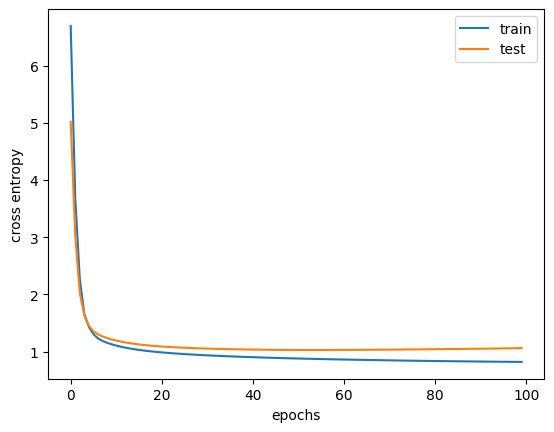

In [6]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# convert pandas DataFrame (X) and numpy array (y) into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 8)
        self.act = nn.ReLU()
        self.output = nn.Linear(8, 11)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x

# loss metric and optimizer
model = Multiclass()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 100
batch_size = 5
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

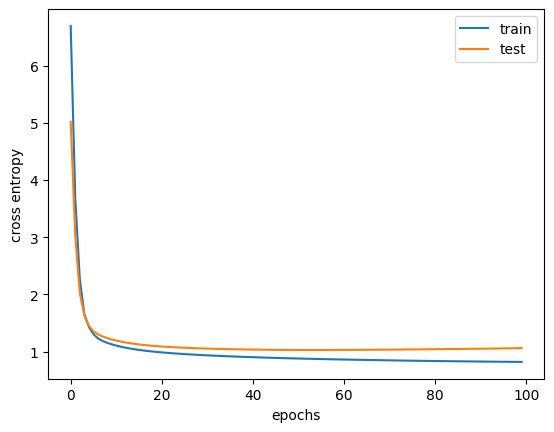

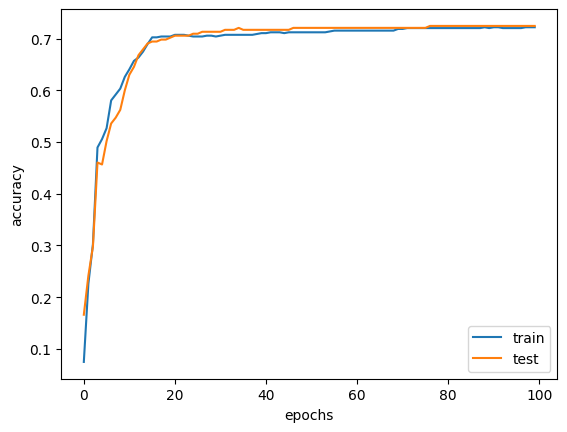

In [7]:

# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## Confusion Matrix

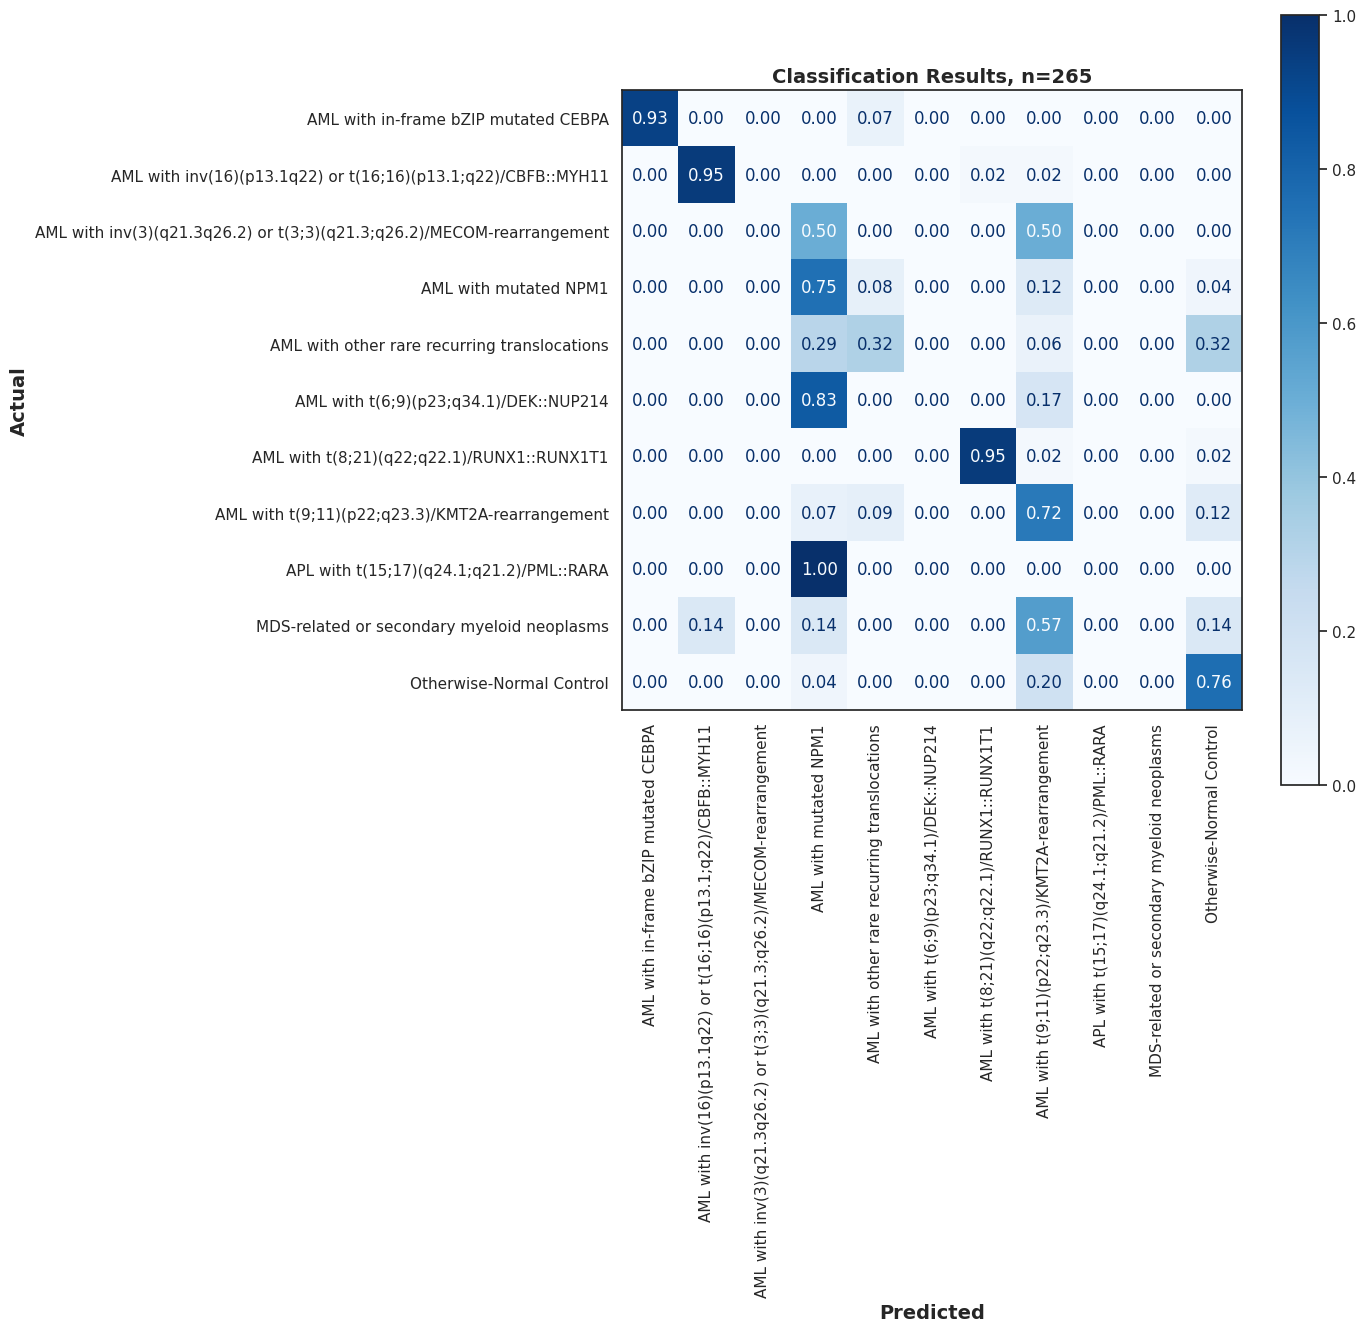

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, label_encoder):
    sns.set_theme(style='white')

    # Make sure the model is in evaluation mode
    model.eval()

    # Compute the model predictions
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred = torch.argmax(y_pred, 1)

    # Convert tensors to NumPy arrays for use with sklearn
    y_pred = y_pred.cpu().numpy()
    y_test = y_test.cpu().numpy()

    cm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues', values_format='.2f', xticks_rotation='vertical')

    # Increase the size of the plot
    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    # Add title and axis names
    plt.title('Classification Results, n=' + str(len(X_test)), fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=14, fontweight='bold')

    plt.show()

plot_confusion_matrix(model, X_test, y_test, label_encoder)
